## Dataset Link: https://www.kaggle.com/omkargurav/face-mask-dataset

In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
import cv2

## Loading Images

In [2]:
path = "YUZ"

myList = os.listdir(path)
noOfClasses = len(myList)

print("Label(sınıf) Sayısı", noOfClasses)

Label(sınıf) Sayısı 2


## Resizing images as (32,32) for Model Requirement

In [3]:
images = []
classNo = []

for i in range(noOfClasses):
    myImageList = os.listdir(path + "\\"+str(i))
    for j in myImageList:
        img = cv2.imread(path + "\\"+str(i)+"\\"+j)
        img = cv2.resize(img,(128,128))
        images.append(img)
        classNo.append(i)
        
print(len(images))
print(len(classNo))

7553
7553


## Converting Images to Array


In [4]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)

(7553, 128, 128, 3)


##  Splitting Data (%80 Train, %20 Validation)

In [5]:
#Veriyi Ayırma
x_train, x_validation, y_train, y_validation = train_test_split(images,classNo,test_size = 0.2, random_state = 42)

print(images.shape)
print(x_train.shape)
print(x_validation.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


## Preprocess

In [6]:
def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    
    return img

x_train = np.array(list(map(preProcess, x_train)))
x_validation = np.array(list(map(preProcess,x_validation)))

x_train = x_train.reshape(-1,128,128,1)
x_validation = x_validation.reshape(-1,128,128,1)



## Data Generate

In [7]:
image_gen = ImageDataGenerator(rotation_range = 20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = "nearest")

image_gen.fit(x_train)


## Creating Model

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape = (128,128,1), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape = (128,128,1), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape = (128,128,1), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid")) 

model.compile(loss = "binary_crossentropy", optimizer ="adam",
              metrics = ["accuracy"])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor = "val_loss",patience=2)

model.fit(x_train,y_train,epochs=10,validation_data = (x_validation,y_validation),callbacks = [early_stop])

Epoch 1/10
189/189 [==============================] - 66s 346ms/step - loss: 0.6050 - accuracy: 0.6592 - val_loss: 0.5150 - val_accuracy: 0.7498
Epoch 2/10
189/189 [==============================] - 67s 354ms/step - loss: 0.4362 - accuracy: 0.7953 - val_loss: 0.3913 - val_accuracy: 0.8226
Epoch 3/10
189/189 [==============================] - 73s 386ms/step - loss: 0.3426 - accuracy: 0.8461 - val_loss: 0.3289 - val_accuracy: 0.8498
Epoch 4/10
189/189 [==============================] - 69s 363ms/step - loss: 0.2830 - accuracy: 0.8777 - val_loss: 0.3021 - val_accuracy: 0.8743
Epoch 5/10
189/189 [==============================] - 67s 352ms/step - loss: 0.2208 - accuracy: 0.9042 - val_loss: 0.2810 - val_accuracy: 0.8829
Epoch 6/10
189/189 [==============================] - 72s 382ms/step - loss: 0.1823 - accuracy: 0.9239 - val_loss: 0.2769 - val_accuracy: 0.8848
Epoch 7/10
189/189 [==============================] - 69s 366ms/step - loss: 0.1439 - accuracy: 0.9434 - val_loss: 0.2881 - val_ac

## Saving Model

In [10]:
import pandas as pd

In [11]:
model.save("modelfolder/")
model.save_weights("modelfolder/")

INFO:tensorflow:Assets written to: modelfolder/assets


In [12]:
metrics = model.history.history

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.604972,0.659219,0.515022,0.749835
1,0.436192,0.795266,0.391277,0.822634
2,0.342645,0.846077,0.328875,0.849768
3,0.282968,0.877689,0.302078,0.874255
4,0.220812,0.904171,0.280982,0.882859
5,0.182293,0.923866,0.276877,0.884844
6,0.143937,0.943396,0.288099,0.891463
7,0.110548,0.955809,0.316166,0.887492


##  Loss and Accuracy Graphics

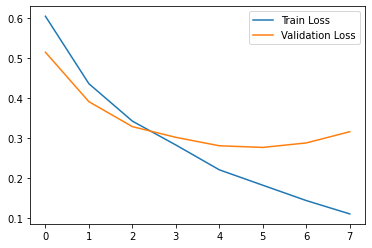

In [14]:
plt.figure()
plt.plot(metrics["loss"], label = "Train Loss")
plt.plot(metrics["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

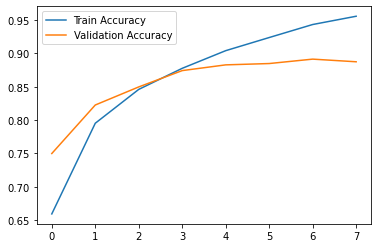

In [15]:
plt.figure()
plt.plot(metrics["accuracy"], label = "Train Accuracy")
plt.plot(metrics["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()